In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
print(data.isnull().sum().sort_values(ascending=False))

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64


In [5]:
data = data.dropna(axis=1, thresh=int(0.8 * len(data)))
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)
data

<ipython-input-5-36ef08463be0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-5-36ef08463be0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-5-36ef08463be0>:4: FutureWarning: A value is trying to be set on a copy 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [6]:
# Convert categorical variables into numeric using Label Encoding
label_encoders = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
lablenc=label_encoders
lablenc

{'MS Zoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'Lot Shape': LabelEncoder(),
 'Land Contour': LabelEncoder(),
 'Utilities': LabelEncoder(),
 'Lot Config': LabelEncoder(),
 'Land Slope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition 1': LabelEncoder(),
 'Condition 2': LabelEncoder(),
 'Bldg Type': LabelEncoder(),
 'House Style': LabelEncoder(),
 'Roof Style': LabelEncoder(),
 'Roof Matl': LabelEncoder(),
 'Exterior 1st': LabelEncoder(),
 'Exterior 2nd': LabelEncoder(),
 'Exter Qual': LabelEncoder(),
 'Exter Cond': LabelEncoder(),
 'Foundation': LabelEncoder(),
 'Bsmt Qual': LabelEncoder(),
 'Bsmt Cond': LabelEncoder(),
 'Bsmt Exposure': LabelEncoder(),
 'BsmtFin Type 1': LabelEncoder(),
 'BsmtFin Type 2': LabelEncoder(),
 'Heating': LabelEncoder(),
 'Heating QC': LabelEncoder(),
 'Central Air': LabelEncoder(),
 'Electrical': LabelEncoder(),
 'Kitchen Qual': LabelEncoder(),
 'Functional': LabelEncoder(),
 'Garage Type': LabelEncoder(),
 'Garage Finish': LabelEnco

In [7]:
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
381,382,527359050,20,5,80.00000,10400,1,3,3,0,...,0,0,0,0,0,0,6,2009,9,3
834,835,906475070,60,5,69.22459,28698,1,1,2,0,...,0,0,0,225,0,0,6,2009,9,0
1898,1899,534429030,90,5,70.00000,9842,1,3,3,0,...,0,0,0,0,0,0,3,2007,9,4
678,679,535451170,90,5,60.00000,7200,1,3,3,0,...,0,0,0,0,0,0,6,2009,9,4
700,701,902109130,190,6,63.00000,7627,1,3,3,0,...,0,148,0,0,0,0,10,2009,9,4


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred

array([180691.05066181, 116769.5384867 , 225077.66716666, 107769.51407522,
       113586.58534954, 201083.2069435 , 169981.42170308, 143215.02366863,
       109586.77901029, 331807.95459482, 249188.85500079, 251113.31035365,
        61459.31441459, 131368.12518936,  85902.7947288 , 170148.13726807,
       147479.30546046, 220181.31978705, 109472.50065899, 141230.47328415,
       175302.49214075, 107914.69653433, 189460.05078347, 215842.92464548,
       204909.32936189, 299102.07413333, 350104.41050478, 232074.53498097,
       209884.6069115 , 220829.26582016, 196523.96367272,  79873.62000938,
       234236.3735185 ,  91076.95980056, 149658.90448172,  61533.87250959,
       210847.35334159, 313285.27671937, 183487.69023139, 271943.92961044,
       310828.46303525, 225271.00319318, 231431.68432871, 201352.627979  ,
       109064.65294948, 305783.66766053, 181304.8750401 , 151481.33066518,
       147822.73192037, 140241.55194731, 199377.33174579, 133040.65838671,
       142537.74479966, 1

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Model Performance:
RMSE: 33326.14
R2 Score: 0.86


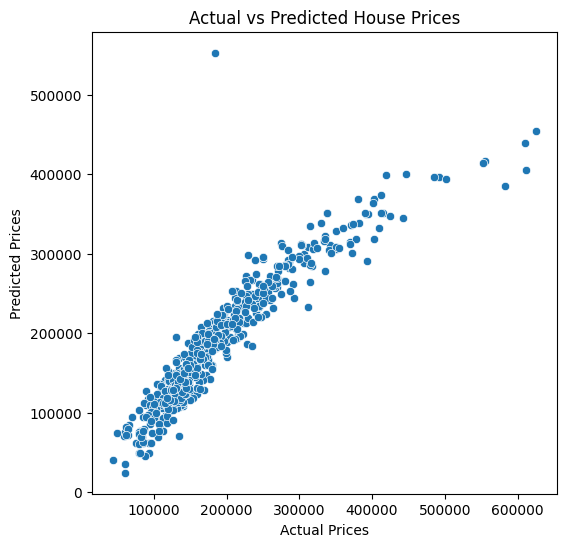

In [11]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

<ipython-input-14-49370a222318>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lables, y=scores, palette="viridis")


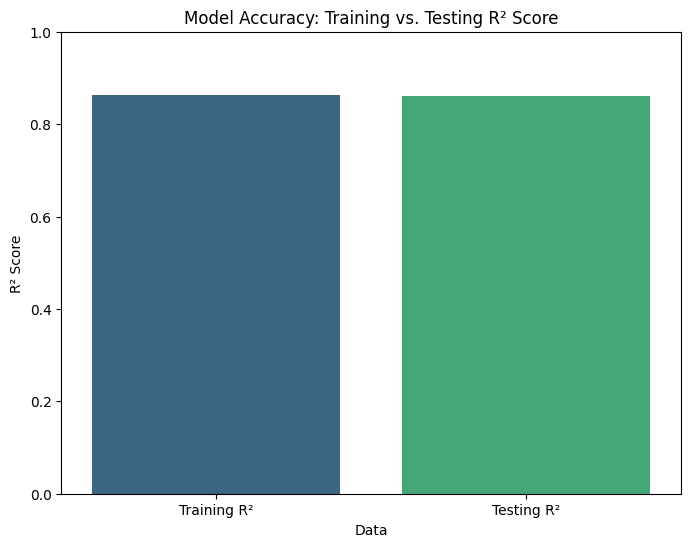

In [14]:
# Calculate training and testing R² scores
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

lables = ["Training R²", "Testing R²"]
scores = [train_r2, test_r2]

# Plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=lables, y=scores, palette="viridis")
plt.ylim(0, 1)
plt.title("Model Accuracy: Training vs. Testing R² Score")
plt.ylabel("R² Score")
plt.xlabel("Data")
plt.show()


<ipython-input-13-db8ee7f55fd3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="coolwarm")


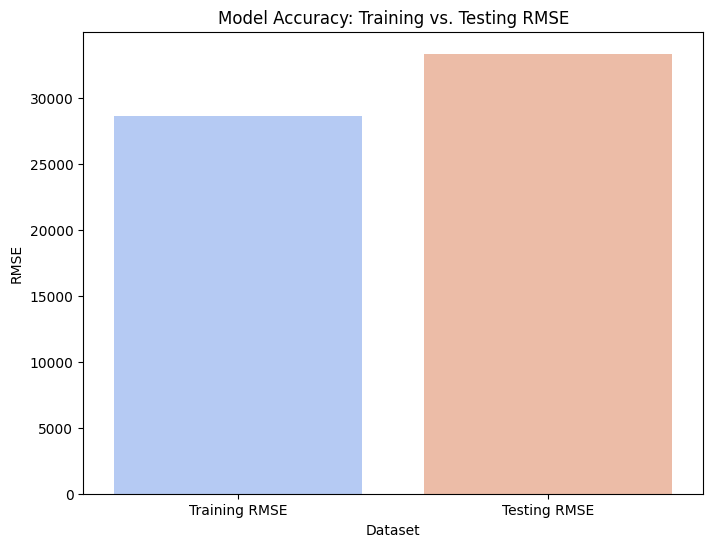

In [13]:
# Calculate train and test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

metrics = ["Training RMSE", "Testing RMSE"]
scores = [train_rmse, test_rmse]

# Plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="coolwarm")
plt.title("Model Accuracy: Training vs. Testing RMSE")
plt.ylabel("RMSE")
plt.xlabel("Dataset")
plt.show()
